In [1]:
# Importing all the dough
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chisquare

import os
import warnings

# Pretty looking cofigs
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("./data/data.csv")
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')
data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,2011-01-03,6177.45,6178.55,6147.20,6157.60,96028639,4477.36
1,2011-01-04,6172.75,6181.05,6124.40,6146.35,181727905,7678.55
2,2011-01-05,6141.35,6141.35,6062.35,6079.80,139614193,6606.21
3,2011-01-06,6107.00,6116.15,6022.30,6048.25,152338978,7050.18
4,2011-01-07,6030.90,6051.20,5883.60,5904.60,171809106,8325.79


In [3]:
data.describe()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
count,2621.000000,2621.000000,2621.000000,2621.000000,2.621000e+03,2621.000000
mean,8697.276116,8741.203243,8637.318714,8689.678462,2.747532e+08,12811.626944
std,2732.034119,2739.781369,2715.124602,2728.318740,2.022228e+08,9723.911242
min,4623.150000,4623.150000,4531.150000,4544.200000,6.555703e+06,297.890000
25%,6018.850000,6050.500000,5977.150000,6007.450000,1.473129e+08,6422.970000
50%,8406.500000,8455.650000,8355.400000,8398.300000,1.932502e+08,8717.160000
75%,10746.800000,10786.050000,10689.700000,10739.950000,3.202500e+08,15967.910000
max,15958.350000,15962.250000,15882.600000,15924.200000,1.811564e+09,78522.930000


In [4]:
data.shape

(2621, 7)

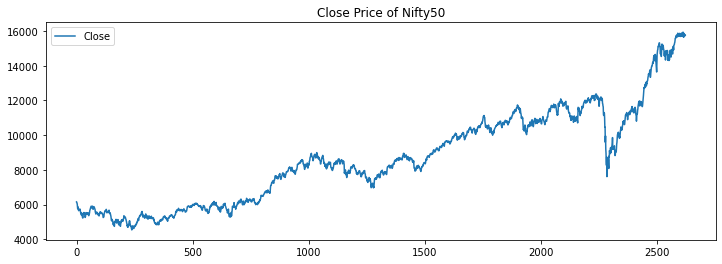

In [5]:
data.plot(y=['Close'], figsize=(12, 4))
plt.legend(loc='best')
plt.title('Close Price of Nifty50')
plt.show(block=False)

In [6]:
# Dropping Turnover as it's not used for model building
data = data.drop("Turnover (Rs. Cr)", axis=1)
data.head()

,Date,Open,High,Low,Close,Shares Traded
0,2011-01-03,6177.45,6178.55,6147.20,6157.60,96028639
1,2011-01-04,6172.75,6181.05,6124.40,6146.35,181727905
2,2011-01-05,6141.35,6141.35,6062.35,6079.80,139614193
3,2011-01-06,6107.00,6116.15,6022.30,6048.25,152338978
4,2011-01-07,6030.90,6051.20,5883.60,5904.60,171809106


In [7]:
# Renaming 'Shared Traded' to 'Volume' as referred in the Thesis
data.rename(columns = {'Shares Traded': 'Volume'}, inplace = True)
data.head()

,Date,Open,High,Low,Close,Volume
0,2011-01-03,6177.45,6178.55,6147.20,6157.60,96028639
1,2011-01-04,6172.75,6181.05,6124.40,6146.35,181727905
2,2011-01-05,6141.35,6141.35,6062.35,6079.80,139614193
3,2011-01-06,6107.00,6116.15,6022.30,6048.25,152338978
4,2011-01-07,6030.90,6051.20,5883.60,5904.60,171809106


In [8]:
# Getting log of 'Volume' to make it comparable to other independent variables
data['Log_Volume'] = np.log(data['Volume'])
data.head()

,Date,Open,High,Low,Close,Volume,Log_Volume
0,2011-01-03,6177.45,6178.55,6147.20,6157.60,96028639,18.380157
1,2011-01-04,6172.75,6181.05,6124.40,6146.35,181727905,19.018021
2,2011-01-05,6141.35,6141.35,6062.35,6079.80,139614193,18.754393
3,2011-01-06,6107.00,6116.15,6022.30,6048.25,152338978,18.841619
4,2011-01-07,6030.90,6051.20,5883.60,5904.60,171809106,18.961895


### Correlation Test

In [9]:
corr_raw = data[['Open', 'High', 'Low', 'Close', 'Volume', 'Log_Volume']].corr()

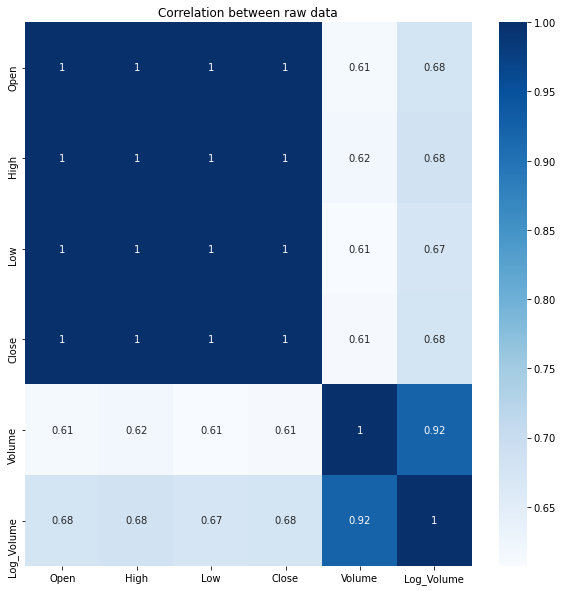

In [10]:
# Plotting a heatmap
fig = plt.figure(figsize=(10,10))
sns.heatmap(corr_raw, annot=True, cmap='Blues')
plt.title('Correlation between raw data')
plt.show()

In [11]:
data = data.drop("Volume", axis=1)
data.head()

,Date,Open,High,Low,Close,Log_Volume
0,2011-01-03,6177.45,6178.55,6147.20,6157.60,18.380157
1,2011-01-04,6172.75,6181.05,6124.40,6146.35,19.018021
2,2011-01-05,6141.35,6141.35,6062.35,6079.80,18.754393
3,2011-01-06,6107.00,6116.15,6022.30,6048.25,18.841619
4,2011-01-07,6030.90,6051.20,5883.60,5904.60,18.961895


### tsFresh

In [12]:
from tsfresh import extract_features
extracted_features = extract_features(data, column_id="Date")

Feature Extraction: 100%|██████████| 20/20 [01:26<00:00,  4.33s/it]


In [13]:
original_extract = extracted_features

In [14]:
extracted_features.columns

Index(['High__variance_larger_than_standard_deviation',
       'High__has_duplicate_max', 'High__has_duplicate_min',
       'High__has_duplicate', 'High__sum_values', 'High__abs_energy',
       'High__mean_abs_change', 'High__mean_change',
       'High__mean_second_derivative_central', 'High__median',
       ...
       'Open__permutation_entropy__dimension_5__tau_1',
       'Open__permutation_entropy__dimension_6__tau_1',
       'Open__permutation_entropy__dimension_7__tau_1',
       'Open__query_similarity_count__query_None__threshold_0.0',
       'Open__matrix_profile__feature_"min"__threshold_0.98',
       'Open__matrix_profile__feature_"max"__threshold_0.98',
       'Open__matrix_profile__feature_"mean"__threshold_0.98',
       'Open__matrix_profile__feature_"median"__threshold_0.98',
       'Open__matrix_profile__feature_"25"__threshold_0.98',
       'Open__matrix_profile__feature_"75"__threshold_0.98'],
      dtype='object', length=3935)

In [15]:
extracted_features.head()

,High__variance_larger_than_standard_deviation,High__has_duplicate_max,High__has_duplicate_min,High__has_duplicate,High__sum_values,High__abs_energy,High__mean_abs_change,High__mean_change,High__mean_second_derivative_central,High__median,...,Open__permutation_entropy__dimension_5__tau_1,Open__permutation_entropy__dimension_6__tau_1,Open__permutation_entropy__dimension_7__tau_1,Open__query_similarity_count__query_None__threshold_0.0,"Open__matrix_profile__feature_""min""__threshold_0.98","Open__matrix_profile__feature_""max""__threshold_0.98","Open__matrix_profile__feature_""mean""__threshold_0.98","Open__matrix_profile__feature_""median""__threshold_0.98","Open__matrix_profile__feature_""25""__threshold_0.98","Open__matrix_profile__feature_""75""__threshold_0.98"
2011-01-03,0.0,0.0,0.0,0.0,6178.55,3.817448e+07,NaN,NaN,NaN,6178.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-04,0.0,0.0,0.0,0.0,6181.05,3.820538e+07,NaN,NaN,NaN,6181.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05,0.0,0.0,0.0,0.0,6141.35,3.771618e+07,NaN,NaN,NaN,6141.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-06,0.0,0.0,0.0,0.0,6116.15,3.740729e+07,NaN,NaN,NaN,6116.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-07,0.0,0.0,0.0,0.0,6051.20,3.661702e+07,NaN,NaN,NaN,6051.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Filtering features

Removing NaN columns

In [16]:
# Example of column 0 unique values - This means that all the values are NaN!
extracted_features['Open__matrix_profile__feature_"mean"__threshold_0.98'].isnull().all()

True

In [17]:
nan_features = extracted_features.isnull().all(axis=0)
nan_features

High__variance_larger_than_standard_deviation             False
High__has_duplicate_max                                   False
High__has_duplicate_min                                   False
High__has_duplicate                                       False
High__sum_values                                          False
                                                          ...  
Open__matrix_profile__feature_"max"__threshold_0.98        True
Open__matrix_profile__feature_"mean"__threshold_0.98       True
Open__matrix_profile__feature_"median"__threshold_0.98     True
Open__matrix_profile__feature_"25"__threshold_0.98         True
Open__matrix_profile__feature_"75"__threshold_0.98         True
Length: 3935, dtype: bool

In [18]:
nan_features.value_counts()

True     2850
False    1085
dtype: int64

Thus, can reduce the usable features to 1085!

In [19]:
nan_features[nan_features == True].index

Index(['High__mean_abs_change', 'High__mean_change',
       'High__mean_second_derivative_central', 'High__skewness',
       'High__kurtosis', 'High__sample_entropy',
       'High__autocorrelation__lag_0', 'High__autocorrelation__lag_1',
       'High__autocorrelation__lag_2', 'High__autocorrelation__lag_3',
       ...
       'Open__permutation_entropy__dimension_5__tau_1',
       'Open__permutation_entropy__dimension_6__tau_1',
       'Open__permutation_entropy__dimension_7__tau_1',
       'Open__query_similarity_count__query_None__threshold_0.0',
       'Open__matrix_profile__feature_"min"__threshold_0.98',
       'Open__matrix_profile__feature_"max"__threshold_0.98',
       'Open__matrix_profile__feature_"mean"__threshold_0.98',
       'Open__matrix_profile__feature_"median"__threshold_0.98',
       'Open__matrix_profile__feature_"25"__threshold_0.98',
       'Open__matrix_profile__feature_"75"__threshold_0.98'],
      dtype='object', length=2850)

In [20]:
extracted_features = extracted_features.drop(nan_features[nan_features == True].index, axis=1)
extracted_features.columns

Index(['High__variance_larger_than_standard_deviation',
       'High__has_duplicate_max', 'High__has_duplicate_min',
       'High__has_duplicate', 'High__sum_values', 'High__abs_energy',
       'High__median', 'High__mean', 'High__length',
       'High__standard_deviation',
       ...
       'Open__ratio_beyond_r_sigma__r_6', 'Open__ratio_beyond_r_sigma__r_7',
       'Open__ratio_beyond_r_sigma__r_10', 'Open__count_above__t_0',
       'Open__count_below__t_0', 'Open__lempel_ziv_complexity__bins_2',
       'Open__lempel_ziv_complexity__bins_3',
       'Open__lempel_ziv_complexity__bins_5',
       'Open__lempel_ziv_complexity__bins_10',
       'Open__lempel_ziv_complexity__bins_100'],
      dtype='object', length=1085)

Removing columns with only one value throughout - as they contribute no variance in information

In [21]:
n = extracted_features.nunique(axis=0)
n

High__variance_larger_than_standard_deviation       1
High__has_duplicate_max                             1
High__has_duplicate_min                             1
High__has_duplicate                                 1
High__sum_values                                 2602
                                                 ... 
Open__lempel_ziv_complexity__bins_2                 1
Open__lempel_ziv_complexity__bins_3                 1
Open__lempel_ziv_complexity__bins_5                 1
Open__lempel_ziv_complexity__bins_10                1
Open__lempel_ziv_complexity__bins_100               1
Length: 1085, dtype: int64

In [22]:
n.unique()

array([   1, 2602,    7, 2597, 2594, 2620,    2, 2596], dtype=int64)

In [23]:
print("Number of columns with unique value throught: ", len(n[n==1]))

Number of columns with unique value throught:  975


In [24]:
# Example of column with unique value
print(set(extracted_features['Open__has_duplicate_min']))
print(set(extracted_features['Open__lempel_ziv_complexity__bins_3']))
print(set(extracted_features['High__has_duplicate']))

{0.0}
{1.0}
{0.0}


In [25]:
extracted_features = extracted_features.drop(n[n == 1].index, axis=1)
extracted_features.columns

Index(['High__sum_values', 'High__abs_energy', 'High__median', 'High__mean',
       'High__root_mean_square', 'High__maximum', 'High__minimum',
       'High__benford_correlation', 'High__quantile__q_0.1',
       'High__quantile__q_0.2',
       ...
       'Open__quantile__q_0.6', 'Open__quantile__q_0.7',
       'Open__quantile__q_0.8', 'Open__quantile__q_0.9',
       'Open__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)',
       'Open__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)',
       'Open__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)',
       'Open__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)',
       'Open__fft_coefficient__attr_"real"__coeff_0',
       'Open__fft_coefficient__attr_"abs"__coeff_0'],
      dtype='object', length=110)

In [28]:
n = extracted_features.nunique(axis = 0)
n

High__sum_values                                                2602
High__abs_energy                                                2602
High__median                                                    2602
High__mean                                                      2602
High__root_mean_square                                          2602
                                                                ... 
Open__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)     2596
Open__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)    2596
Open__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)    2596
Open__fft_coefficient__attr_"real"__coeff_0                     2596
Open__fft_coefficient__attr_"abs"__coeff_0                      2596
Length: 110, dtype: int64

In [29]:
n.unique()

array([2602,    7, 2597, 2594, 2620,    2, 2596], dtype=int64)

### Analysing Final Features

2 Unique Values

In [36]:
# 2 unique values
print(n[n==2].index)
extracted_features[n[n==2].index]

Index(['Log_Volume__benford_correlation'], dtype='object')


,Log_Volume__benford_correlation
2011-01-03,0.864123
2011-01-04,0.864123
2011-01-05,0.864123
2011-01-06,0.864123
2011-01-07,0.864123
...,...
2021-07-26,0.864123
2021-07-27,0.864123
2021-07-28,0.864123
2021-07-29,0.864123


In [37]:
extracted_features[n[n==2].index].value_counts()

Log_Volume__benford_correlation
0.864123                           2216
0.295657                            405
dtype: int64

Useful for anomaly detection application. Returns the correlation from first digit distribution when compared to the Newcomb-Benford’s Law distribution.

Benford's law, also called the Newcomb–Benford law, the law of anomalous numbers, or the first-digit law, is an observation that in many real-life sets of numerical data, the leading digit is likely to be small. In sets that obey the law, the number 1 appears as the leading significant digit about 30 % of the time, while 9 appears as the leading significant digit less than 5 % of the time. If the digits were distributed uniformly, they would each occur about 11.1 % of the time. Benford's law also makes predictions about the distribution of second digits, third digits, digit combinations, and so on.

$$P(d) = log_{10}(1 + \frac{1}{d})$$

where P(d) is the Newcomb-Benford distribution for d that is the leading digit of the number {1, 2, 3, 4, 5, 6, 7, 8, 9}.

7 Unique Values

In [40]:
# 2 unique values
print(n[n==7].index)
extracted_features[n[n==7].index]

Index(['High__benford_correlation', 'Low__benford_correlation',
       'Close__benford_correlation', 'Open__benford_correlation'],
      dtype='object')


,High__benford_correlation,Low__benford_correlation,Close__benford_correlation,Open__benford_correlation
2011-01-03,-0.200946,-0.200946,-0.200946,-0.200946
2011-01-04,-0.200946,-0.200946,-0.200946,-0.200946
2011-01-05,-0.200946,-0.200946,-0.200946,-0.200946
2011-01-06,-0.200946,-0.200946,-0.200946,-0.200946
2011-01-07,-0.200946,-0.145280,-0.145280,-0.200946
...,...,...,...,...
2021-07-26,0.864123,0.864123,0.864123,0.864123
2021-07-27,0.864123,0.864123,0.864123,0.864123
2021-07-28,0.864123,0.864123,0.864123,0.864123
2021-07-29,0.864123,0.864123,0.864123,0.864123


In [41]:
n.unique()

array([2602,    7, 2597, 2594, 2620,    2, 2596], dtype=int64)

Rest of the values are pretty distributed. We can now proceed to correlation determination

In [43]:
ef_corr = extracted_features.corr()

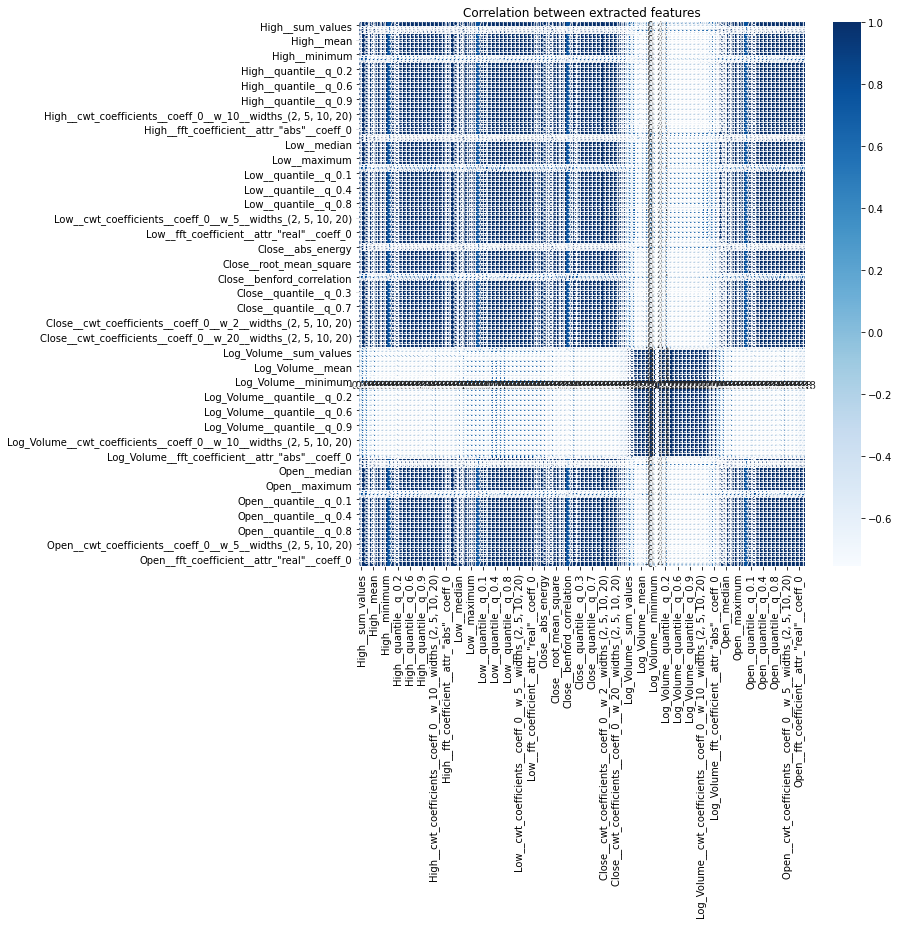

In [44]:
# Plotting a heatmap
fig = plt.figure(figsize=(10,10))
sns.heatmap(ef_corr, annot=True, cmap='Blues')
plt.title('Correlation between extracted features')
plt.show()

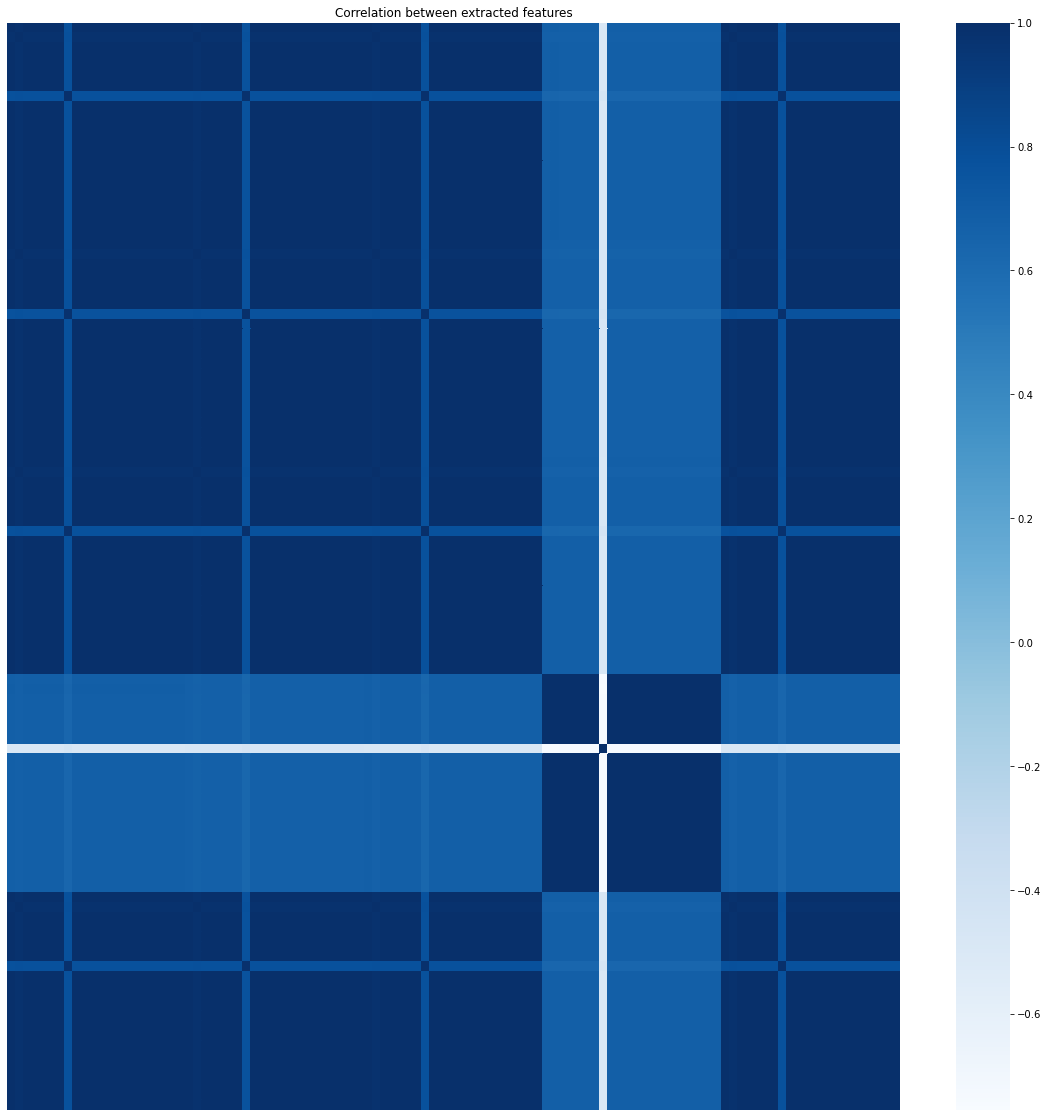

In [47]:
# Plotting a heatmap
fig = plt.figure(figsize=(20,20))
sns.heatmap(ef_corr, annot=False, xticklabels=False, yticklabels=False, cmap='Blues')
plt.title('Correlation between extracted features')
plt.show()

How to get rid of this huge correlation!?

In [48]:
extracted_features.filter(regex='^.*".*$', axis=1).columns

Index(['High__fft_coefficient__attr_"real"__coeff_0',
       'High__fft_coefficient__attr_"abs"__coeff_0',
       'Low__fft_coefficient__attr_"real"__coeff_0',
       'Low__fft_coefficient__attr_"abs"__coeff_0',
       'Close__fft_coefficient__attr_"real"__coeff_0',
       'Close__fft_coefficient__attr_"abs"__coeff_0',
       'Log_Volume__fft_coefficient__attr_"real"__coeff_0',
       'Log_Volume__fft_coefficient__attr_"abs"__coeff_0',
       'Open__fft_coefficient__attr_"real"__coeff_0',
       'Open__fft_coefficient__attr_"abs"__coeff_0'],
      dtype='object')

In [64]:
extracted_features.columns

Index(['High__sum_values', 'High__abs_energy', 'High__median', 'High__mean',
       'High__root_mean_square', 'High__maximum', 'High__minimum',
       'High__benford_correlation', 'High__quantile__q_0.1',
       'High__quantile__q_0.2',
       ...
       'Open__quantile__q_0.6', 'Open__quantile__q_0.7',
       'Open__quantile__q_0.8', 'Open__quantile__q_0.9',
       'Open__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)',
       'Open__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)',
       'Open__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)',
       'Open__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)',
       'Open__fft_coefficient__attr_"real"__coeff_0',
       'Open__fft_coefficient__attr_"abs"__coeff_0'],
      dtype='object', length=110)

In [65]:
print(len(extracted_features.filter(regex='^Open', axis=1).columns))
extracted_features.filter(regex='^Open', axis=1).columns

22


Index(['Open__sum_values', 'Open__abs_energy', 'Open__median', 'Open__mean',
       'Open__root_mean_square', 'Open__maximum', 'Open__minimum',
       'Open__benford_correlation', 'Open__quantile__q_0.1',
       'Open__quantile__q_0.2', 'Open__quantile__q_0.3',
       'Open__quantile__q_0.4', 'Open__quantile__q_0.6',
       'Open__quantile__q_0.7', 'Open__quantile__q_0.8',
       'Open__quantile__q_0.9',
       'Open__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)',
       'Open__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)',
       'Open__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)',
       'Open__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)',
       'Open__fft_coefficient__attr_"real"__coeff_0',
       'Open__fft_coefficient__attr_"abs"__coeff_0'],
      dtype='object')

Thus, per raw feature, we've been able to derive 22 features.

In [81]:
extracted_features[['Open__sum_values', 'Open__abs_energy', 'Open__median', 'Open__mean', 'Open__root_mean_square',
                    'Open__maximum', 'Open__minimum','Open__benford_correlation']].corr()

,Open__sum_values,Open__abs_energy,Open__median,Open__mean,Open__root_mean_square,Open__maximum,Open__minimum,Open__benford_correlation
Open__sum_values,1.000000,0.985985,1.000000,1.000000,1.000000,1.000000,1.000000,0.775580
Open__abs_energy,0.985985,1.000000,0.985985,0.985985,0.985985,0.985985,0.985985,0.781801
Open__median,1.000000,0.985985,1.000000,1.000000,1.000000,1.000000,1.000000,0.775580
Open__mean,1.000000,0.985985,1.000000,1.000000,1.000000,1.000000,1.000000,0.775580
Open__root_mean_square,1.000000,0.985985,1.000000,1.000000,1.000000,1.000000,1.000000,0.775580
Open__maximum,1.000000,0.985985,1.000000,1.000000,1.000000,1.000000,1.000000,0.775580
Open__minimum,1.000000,0.985985,1.000000,1.000000,1.000000,1.000000,1.000000,0.775580
Open__benford_correlation,0.775580,0.781801,0.775580,0.775580,0.775580,0.775580,0.775580,1.000000


##### CWT Coefficients

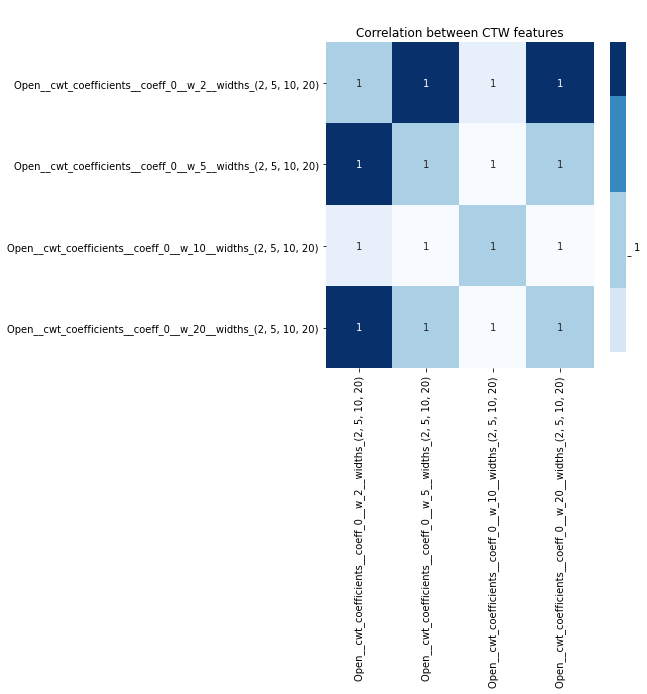

In [77]:
cwt_corr = extracted_features.filter(regex='^Open__cwt', axis=1).corr()
# Plotting a heatmap
fig = plt.figure(figsize=(6,6))
sns.heatmap(cwt_corr, annot=True, cmap='Blues')
plt.title('Correlation between CTW features')
plt.show()

In [76]:
extracted_features.filter(regex='^Open__cwt', axis=1)

,"Open__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)","Open__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)","Open__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)","Open__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)"
2011-01-03,3788.577199,2396.106608,1694.303231,1198.053304
2011-01-04,3785.694729,2394.283574,1693.014151,1197.141787
2011-01-05,3766.437378,2382.104156,1684.402002,1191.052078
2011-01-06,3745.370817,2368.780493,1674.980750,1184.390246
2011-01-07,3698.699339,2339.262858,1654.108630,1169.631429
...,...,...,...,...
2021-07-26,9720.240003,6147.619562,4347.023481,3073.809781
2021-07-27,9727.108867,6151.963813,4350.095330,3075.981907
2021-07-28,9666.423679,6113.583131,4322.956089,3056.791565
2021-07-29,9667.128964,6114.029192,4323.271502,3057.014596


These are completely correlated but the values aren't the same. So we'll keep them

##### FFT Coefficients

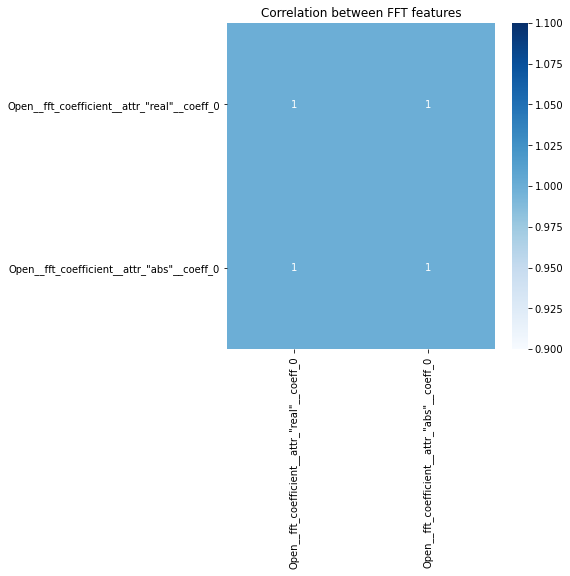

In [82]:
fft_corr = extracted_features.filter(regex='^Open__fft', axis=1).corr()
# Plotting a heatmap
fig = plt.figure(figsize=(6,6))
sns.heatmap(fft_corr, annot=True, cmap='Blues')
plt.title('Correlation between FFT features')
plt.show()

In [83]:
extracted_features.filter(regex='^Open__fft', axis=1)

,"Open__fft_coefficient__attr_""real""__coeff_0","Open__fft_coefficient__attr_""abs""__coeff_0"
2011-01-03,6177.45,6177.45
2011-01-04,6172.75,6172.75
2011-01-05,6141.35,6141.35
2011-01-06,6107.00,6107.00
2011-01-07,6030.90,6030.90
...,...,...
2021-07-26,15849.30,15849.30
2021-07-27,15860.50,15860.50
2021-07-28,15761.55,15761.55
2021-07-29,15762.70,15762.70


FFT Coefficients are completely correlated and even the values are same. Can drop one of them.

In [55]:
corr_ex_open = (extracted_features.filter(regex='^Open', axis=1)).corr()

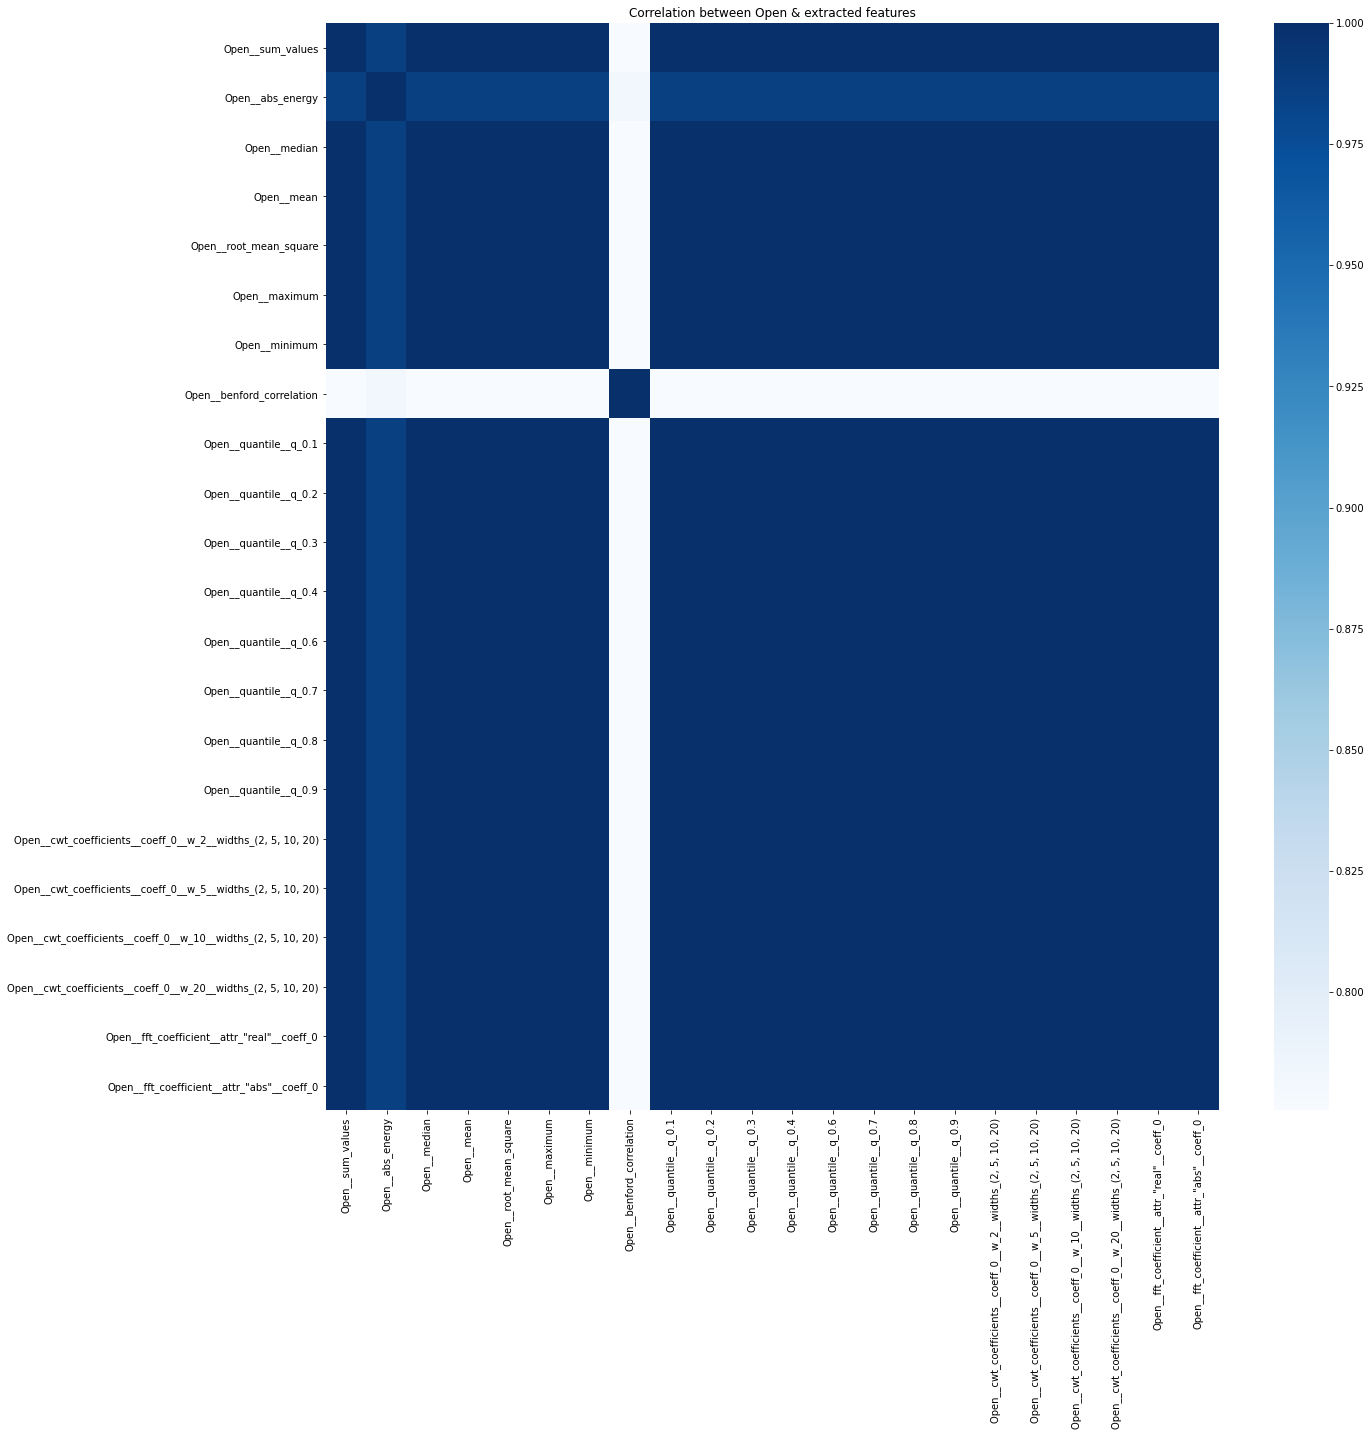

In [57]:
# Plotting a heatmap
fig = plt.figure(figsize=(20,20))
sns.heatmap(corr_ex_open, cmap='Blues')
plt.title('Correlation between Open & extracted features')
plt.show()